In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/kaggle/input/london-housing-dataset/London Housing Data.csv')
df

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...
13544,9/1/2019,england,249942,E92000001,64605.0,NaN
13545,10/1/2019,england,249376,E92000001,68677.0,NaN
13546,11/1/2019,england,248515,E92000001,67814.0,NaN
13547,12/1/2019,england,250410,E92000001,NaN,NaN


In [5]:
df.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN


In [9]:
df.shape

(13549, 6)

In [10]:
df.index

RangeIndex(start=0, stop=13549, step=1)

In [11]:
df.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes'], dtype='object')

In [12]:
df.rename({"date":"Date","area":"Area","average_price":"Average_price","code":"Code","houses_sold":"Houses_sold","no_of_crimes":"No_of_crimes"},inplace =True,axis = 1)

In [13]:
df.head(3)

,Date,Area,Average_price,Code,Houses_sold,No_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN


In [14]:
df.isnull().sum()

Date                0
Area                0
Average_price       0
Code                0
Houses_sold        94
No_of_crimes     6110
dtype: int64

In [15]:
df.count()

Date             13549
Area             13549
Average_price    13549
Code             13549
Houses_sold      13455
No_of_crimes      7439
dtype: int64

In [17]:
df.dtypes

Date              object
Area              object
Average_price      int64
Code              object
Houses_sold      float64
No_of_crimes     float64
dtype: object

In [19]:
df["Houses_sold"] = df["Houses_sold"].fillna(df["Houses_sold"].mean())
df["No_of_crimes"] = df["No_of_crimes"].fillna(df["No_of_crimes"].mean())

In [20]:
df.isnull().sum()

Date             0
Area             0
Average_price    0
Code             0
Houses_sold      0
No_of_crimes     0
dtype: int64

In [21]:
df.Area.unique()

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'tower hamlets', 'greenwich', 'hackney', 'south east',
       'hammersmith and fulham', 'haringey', 'harrow', 'havering',
       'hillingdon', 'hounslow', 'islington', 'kensington and chelsea',
       'kingston upon thames', 'lambeth', 'lewisham', 'merton', 'newham',
       'redbridge', 'richmond upon thames', 'southwark', 'sutton',
       'waltham forest', 'wandsworth', 'westminster', 'inner london',
       'outer london', 'north east', 'north west', 'yorks and the humber',
       'east midlands', 'west midlands', 'east of england', 'london',
       'south west', 'england'], dtype=object)

In [22]:
df[df.duplicated()]

,Date,Area,Average_price,Code,Houses_sold,No_of_crimes


**Question Number 1 : Convert the datatype of "Date" column to "Date-Time" format?

In [23]:
df.dtypes

Date              object
Area              object
Average_price      int64
Code              object
Houses_sold      float64
No_of_crimes     float64
dtype: object

In [24]:
df["Date"]=pd.to_datetime(df["Date"])

In [25]:
df.dtypes

Date             datetime64[ns]
Area                     object
Average_price             int64
Code                     object
Houses_sold             float64
No_of_crimes            float64
dtype: object

Question Number 2 : Add a new column "year" in the dataframe,which contains years only?

In [27]:
df.head(2)

,Date,Area,Average_price,Code,Houses_sold,No_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,2158.352063
1,1995-02-01,city of london,82203,E09000001,7.0,2158.352063


In [67]:
df["Year"]=df["Date"].dt.year

In [68]:
df.head(2)

,Date,Area,Average_price,Code,Houses_sold,No_of_crimes,Year
0,1995-01-01,city of london,91449,E09000001,17.0,2158.352063,1995
1,1995-02-01,city of london,82203,E09000001,7.0,2158.352063,1995


Question Number 3 : Add a new column "Month" as 2nd column in the dataframe,which contains "Month" only?

In [63]:
df.insert(1,"Month",df["Date"].dt.month)

In [64]:
df.head(2)

,Date,Month,Area,Average_price,Code,Houses_sold,No_of_crimes,Year
0,1995-01-01,1,city of london,91449,E09000001,17.0,2158.352063,1995
1,1995-02-01,2,city of london,82203,E09000001,7.0,2158.352063,1995


Question Number 4 : Remove the column "Month" from the dataframe?

In [65]:
df.drop(columns = ["Month"],inplace = True)

In [66]:
df.head(2)

,Date,Area,Average_price,Code,Houses_sold,No_of_crimes,Year
0,1995-01-01,city of london,91449,E09000001,17.0,2158.352063,1995
1,1995-02-01,city of london,82203,E09000001,7.0,2158.352063,1995


Question Number 5 : Show all the records where "no. of crimes" is 0?

In [38]:
len(df[df["No_of_crimes"]==0])

104

Show all the records where "no. of crimes" is 0?Question Number 6 :Total count of records of each area where 'avg price ' is less than 100000

In [70]:
df['Average_price']<100000

0         True
1         True
2         True
3         True
4         True
         ...  
13544    False
13545    False
13546    False
13547    False
13548    False
Name: Average_price, Length: 13549, dtype: bool

In [71]:
df[df["Average_price"]<100000]

,Date,Area,Average_price,Code,Houses_sold,No_of_crimes,Year
0,1995-01-01,city of london,91449,E09000001,17.0,2158.352063,1995
1,1995-02-01,city of london,82203,E09000001,7.0,2158.352063,1995
2,1995-03-01,city of london,79121,E09000001,14.0,2158.352063,1995
3,1995-04-01,city of london,77101,E09000001,7.0,2158.352063,1995
4,1995-05-01,city of london,84409,E09000001,10.0,2158.352063,1995
...,...,...,...,...,...,...,...
13330,2001-11-01,england,95083,E92000001,109149.0,2158.352063,2001
13331,2001-12-01,england,95992,E92000001,93329.0,2158.352063,2001
13332,2002-01-01,england,96215,E92000001,71678.0,2158.352063,2002
13333,2002-02-01,england,96676,E92000001,77131.0,2158.352063,2002


In [72]:
df[df["Average_price"]<100000]["Area"].value_counts()

Area
north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
bexley                   64
waltham forest           64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
enfield                  54
sutton                   54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
haringey                 33
bromley                  33
inner london             31
ealing                   31
kingston upon thames     30
harrow         

Visualizations

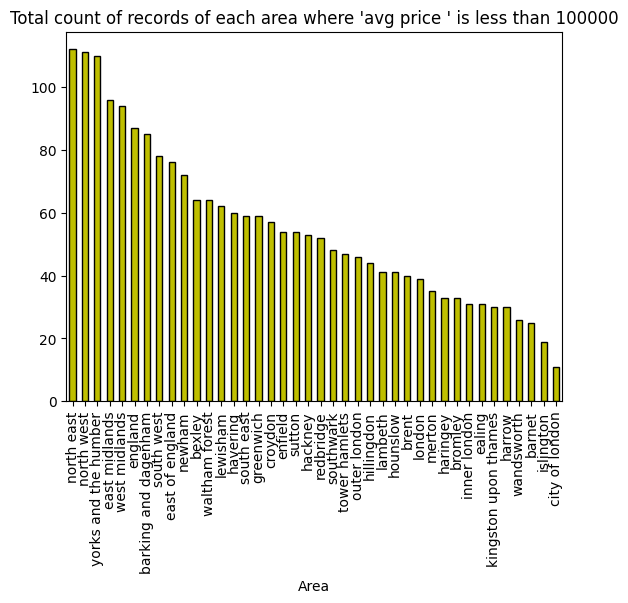

In [75]:
df[df['Average_price']<100000]['Area'].value_counts().plot(kind='bar', color='y', edgecolor='black')
plt.title("Total count of records of each area where 'average price' is less than 100000" )
plt.show()

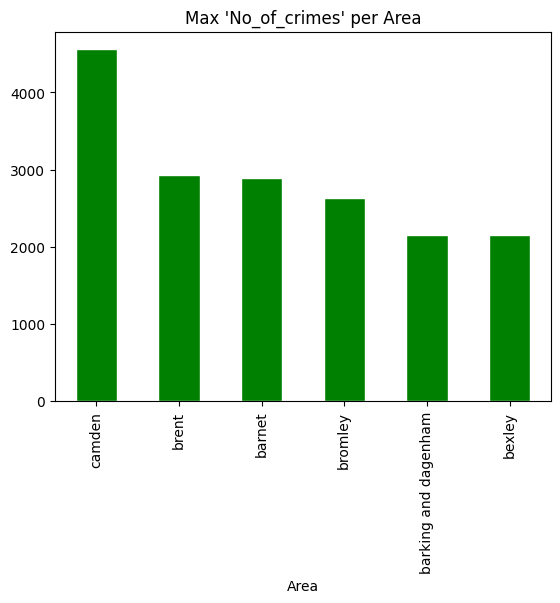

In [79]:
df.groupby('Area')['No_of_crimes'].max().head(6).sort_values(ascending=False).plot(kind='bar', color='Green', edgecolor='White')
plt.title("Max 'No_of_crimes' per Area")

plt.show()

**********END******************